**1. Importing Necessary libraries and  Made a class of Kalman Filter**

In [1]:
import csv
import math
import pandas as pd
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
import math

class KalmanFilter:

    cov = float('nan')
    x = float('nan')

    def __init__(self, R, Q):
        """
        Constructor
        :param R: Process Noise
        :param Q: Measurement Noise
        """
        self.A = 1
        self.B = 0
        self.C = 1

        self.R = R
        self.Q = Q

    def filter(self, measurement):
        """
        Filters a measurement
        :param measurement: The measurement value to be filtered
        :return: The filtered value
        """
        u = 0
        if math.isnan(self.x):
            self.x = (1 / self.C) * measurement
            self.cov = (1 / self.C) * self.Q * (1 / self.C)
        else:
            predX = (self.A * self.x) + (self.B * u)
            predCov = ((self.A * self.cov) * self.A) + self.R

            # Kalman Gain
            K = predCov * self.C * (1 / ((self.C * predCov * self.C) + self.Q));

            # Correction
            self.x = predX + K * (measurement - (self.C * predX));
            self.cov = predCov - (K * self.C * predCov);

        return self.x

    def last_measurement(self):
        """
        Returns the last measurement fed into the filter
        :return: The last measurement fed into the filter
        """
        return self.x

    def set_measurement_noise(self, noise):
        """
        Sets measurement noise
        :param noise: The new measurement noise
        """
        self.Q = noise

    def set_process_noise(self, noise):
        """
        Sets process noise
        :param noise: The new process noise
        """
        self.R = noise


**2. Combining datasets and preprocessing**

The os.listdir() function is used to list all the files in the data_folder. The if file_name.endswith('.csv') condition ensures that only CSV files are processed. The os.path.join() function is used to construct the full file path to each CSV file, and the pd.read_csv() function is used to read the CSV file into a DataFrame

In [2]:
import os

# actual_dist=1 #varies with 1m to 25 m

# # Set the path to the folder containing the dataset
# data_folder = 'C:/Users/LILA/RTT-RSS with Kalman/raw_dataset'

# # Loop through each CSV file in the folder and read it into a DataFrame
# for file_name in os.listdir(data_folder):
#     if file_name.endswith(str(actual_dist)+'m.csv'):
#         file_path = os.path.join(data_folder, file_name)
#         df = pd.read_csv(file_path)
# df.drop(['#<Time(ms)>','<Ch-MHz>','<Burst#>','<AP-SSID>','<RTT AP?>','<Successes#>'],axis=1,inplace=True)
# df.rename(columns={'<True Range(m)>': 'True_Range', '<Est. Range(m)>': 'Est_Range','<RSSI(dBm)>': 'RSSI','<Std dev(m)>': 'stdev','<Successes#>': 'successes'}, inplace=True)
# Est=df.Est_Range
# R_RTT=Est.var()
# data1_RTT=Est.to_list()

In [3]:
import os
actual_dist=1#varies with 1m to 25 m

# Set the path to the folder containing the dataset
# data_folder = 'C:\Users\LILA\Desktop\RTT-RSS with Kalman_offset\raw_dataset'
data_folder = r'C:\Users\LILA\Desktop\RTT-RSS with Kalman_offset\raw_dataset'
#data_folder = 'C:/Users/LILA/RTT-RSS with Kalman/raw_dataset'
# Loop through each CSV file in the folder and read it into a DataFrame
for file_name in os.listdir(data_folder):
     if file_name == (str(actual_dist)+'m.csv'): #if it found filname after defining file path break
        file_path = os.path.join(data_folder, file_name)
        df = pd.read_csv(file_path)
        break
df.drop(['#<Time(ms)>','<Ch-MHz>','<Burst#>','<AP-SSID>','<RTT AP?>','<Successes#>'],axis=1,inplace=True)
df.rename(columns={'<True Range(m)>': 'True_Range', '<Est. Range(m)>': 'Est_Range','<RSSI(dBm)>': 'RSSI','<Std dev(m)>': 'stdev','<Successes#>': 'successes'}, inplace=True)
Est=df.Est_Range
R_RTT=Est.var()
data1_RTT=Est.to_list()
df

,True_Range,Est_Range,stdev,RSSI
0,1,0.842,0.280,-45
1,1,0.666,0.088,-47
2,1,0.989,0.132,-45
3,1,0.901,0.098,-45
4,1,0.871,0.162,-46
...,...,...,...,...
294,1,0.901,0.428,-46
295,1,0.666,0.278,-50
296,1,0.696,0.256,-47
297,1,0.491,0.146,-45


In [4]:
import numpy as np
import pandas as pd

def remove_outliers(df, col_name, threshold=3):
    """
    Remove outliers from a Pandas DataFrame using the Z-score method.
    
    Parameters:
        df (pandas.DataFrame): The DataFrame to remove outliers from.
        col_name (str): The column name to remove outliers from.
        threshold (float): The Z-score threshold for outlier detection. Default is 3.
        
    Returns:
        A new DataFrame with outliers removed.
    """
    # Calculate the Z-score for each value in the column
    z_scores = np.abs((df[col_name] - df[col_name].mean()) / df[col_name].std())
    
    # Create a boolean mask where values with a Z-score greater than the threshold are set to False
    mask = z_scores <= threshold
    
    # Return a new DataFrame with the outliers removed
    return df[mask]

# Load the original DataFrame with column name 'Est_Range'
col_name = 'Est_Range'

# Remove outliers from the 'Est_Range' column
df = remove_outliers(df, col_name, threshold=3)
df
# # Save the new DataFrame to a CSV file
#df.to_csv('new_data_file.csv', index=False)


,True_Range,Est_Range,stdev,RSSI
0,1,0.842,0.280,-45
1,1,0.666,0.088,-47
2,1,0.989,0.132,-45
3,1,0.901,0.098,-45
4,1,0.871,0.162,-46
...,...,...,...,...
294,1,0.901,0.428,-46
295,1,0.666,0.278,-50
296,1,0.696,0.256,-47
297,1,0.491,0.146,-45


**3. Callibrating offset value of RTT Distance**


In [5]:
# RTT_offset= np.mean(df.Est_Range-df.True_Range)
# # a=np.average(df.stdev)
# # RTT_offset=RTT_offset/a
# print("Range Offset for "+str(actual_dist)+"m is:",RTT_offset)

In [6]:
# Calculate the mean value and standard deviation of the distance measurements
mean_distance = df['Est_Range'].mean()
std_distance = df['stdev'].mean()

# Calculate the offset value using the standard deviation
true_range = df['True_Range'].mean()
offset = (true_range - mean_distance) / (1 - std_distance / true_range)

print("Offset value: ", offset)


Offset value:  0.4176112860074568


In [7]:
offset=np.mean(df.Est_Range-df.True_Range)
offset

-0.26261824324324323

In [8]:
# RTT_offset= np.average(df.stdev)
# print("Range Offset for "+str(actual_dist)+"m is:",RTT_offset)

**4. Updated dataset with offset values**

In [9]:
# # df['Final_range']=df['Est_Range']-RTT_offset
# pd.options.mode.chained_assignment = None #to avoid warning
# df.loc[:, 'Final_range'] = df['Est_Range'] - RTT_offset #To avoid this warning, we can use .loc or .iloc to explicitly modify the original DataFrame
# df['Raw_error']=df['True_Range']-df['Est_Range']
# df['Callibrated_data_error']=df['True_Range']-df['Final_range']
# df
# Apply the offset to the estimated range values to get the final range values
pd.options.mode.chained_assignment = None
df.loc[:,'Final_range'] = df['Est_Range'] - offset


In [10]:

# Calculate the error before applying the offset
df['Error_before_offset'] = abs(df['Est_Range'] - df['True_Range'])

# Calculate the error after applying the offset
df['Error_after_offset'] = df['Final_range'] - df['True_Range']

df

,True_Range,Est_Range,stdev,RSSI,Final_range,Error_before_offset,Error_after_offset
0,1,0.842,0.280,-45,1.104618,0.158,0.104618
1,1,0.666,0.088,-47,0.928618,0.334,-0.071382
2,1,0.989,0.132,-45,1.251618,0.011,0.251618
3,1,0.901,0.098,-45,1.163618,0.099,0.163618
4,1,0.871,0.162,-46,1.133618,0.129,0.133618
...,...,...,...,...,...,...,...
294,1,0.901,0.428,-46,1.163618,0.099,0.163618
295,1,0.666,0.278,-50,0.928618,0.334,-0.071382
296,1,0.696,0.256,-47,0.958618,0.304,-0.041382
297,1,0.491,0.146,-45,0.753618,0.509,-0.246382


In [11]:
raw_error= df['Error_before_offset']
calibrated_error=df['Error_after_offset']
print(np.mean(calibrated_error))
print(np.mean(raw_error))


from sklearn.metrics import mean_squared_error
from math import sqrt


mse_b = mean_squared_error(df['True_Range'], df['Est_Range'])
print("Mean Squared Error in meter: {:.3f}" .format(mse_b))

rmse_b=sqrt(mean_squared_error(df['True_Range'], df['Est_Range'])) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse_b))


mse_a = mean_squared_error(df['True_Range'], df['Final_range'])
print("Mean Squared Error in meter: {:.3f}" .format(mse_a))

rmse_a=sqrt(mean_squared_error(df['True_Range'], df['Final_range'])) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse_a))





-6.00120553851436e-18
0.26480067567567567
Mean Squared Error in meter: 0.087
Root Mean Squared Error (RMSE) on new data in meter: 0.295
Mean Squared Error in meter: 0.018
Root Mean Squared Error (RMSE) on new data in meter: 0.135


In [12]:
# # Specify the file name and path where you want to save the file
file_path = 'Offset_'+str(actual_dist)+'m.csv'


# Save the DataFrame to a CSV file using the to_csv() method
df.to_csv(file_path, index=False)

print(f'File saved to {file_path}!')

File saved to Offset_1m.csv!


In [13]:
Est=df.Final_range
R_RTT=Est.var()
data1_RTT=Est.to_list()
R_RTT

0.01840680631012368

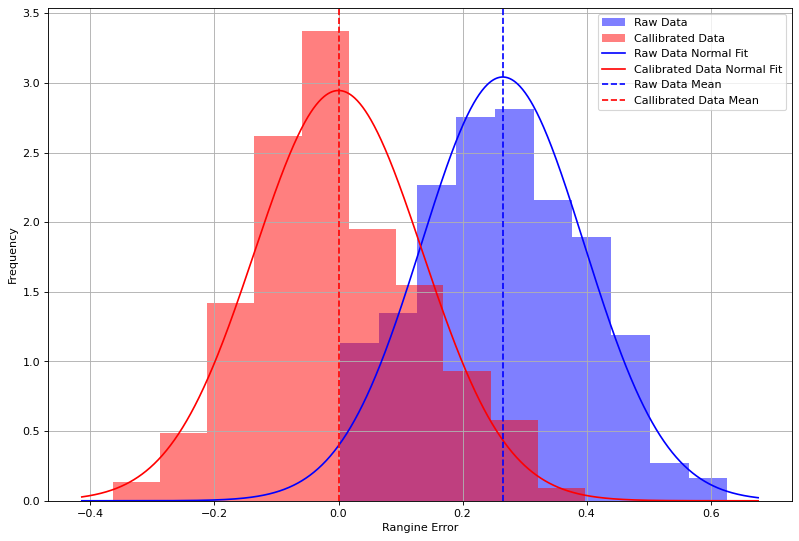

In [14]:
from scipy.stats import norm
from matplotlib.pyplot import figure


figure(figsize=(12,8), dpi=80)
plt.hist(raw_error, bins=10, alpha=0.5, density=True, color='blue', label='Raw Data')
plt.hist(calibrated_error, bins=10, alpha=0.5, density=True, color='red', label='Callibrated Data')
plt.legend(loc='upper right')
plt.xlabel('Rangine Error')
plt.ylabel('Frequency')


xmin, xmax = plt.xlim() 
x = np.linspace(xmin, xmax, 1000) #for gaussian plot
plt.plot(x, norm.pdf(x, np.mean(raw_error), np.std(raw_error)), 'b-', label='Raw Data Normal Fit')
plt.plot(x, norm.pdf(x, np.mean(calibrated_error), np.std(calibrated_error)), 'r-', label='Calibrated Data Normal Fit')
plt.legend(loc='upper right')

plt.axvline(np.mean(raw_error), color='blue', linestyle='--', label='Raw Data Mean')
plt.axvline(np.mean(calibrated_error), color='red', linestyle='--', label='Callibrated Data Mean')


plt.legend()
plt.grid()
plt.show()

In [15]:
test = KalmanFilter(0.01,R_RTT)
testData =data1_RTT
data=[] # for storing all data
for x in testData:
    #data2= test.filter(x)
    #print ("Filtered Data:",data2)
    data.append(test.filter(x)) 
output=list(map(float,data))    #making it in the list
output_RTT=np.array(output)
#print(output)
#print(data)
output_RTT.shape

(296,)

In [16]:
RSSI=df.RSSI
R_RSSI=RSSI.var()
data1_RSS=RSSI.to_list()
#data2=np.array(data1) #converting list to array
#data2

In [17]:
test = KalmanFilter(0.01,R_RSSI)
testData =data1_RSS
data=[] # for storing all data
for x in testData:
    data2= test.filter(x)
    #print ("Filtered Data:",data2)
    data.append(test.filter(x)) 
output=list(map(float,data))    #making it in the list
output_RSS=np.array(output)
#print(output_RSS)
output_RSS.shape

(296,)

In [18]:
# Define the column names for the DataFrame
columns = ['RTT', 'RSS']

# Create the DataFrame from the two separate lists
df_final = pd.DataFrame({'RTT': output_RTT, 'RSS': output_RSS})

# Specify the file name and path where you want to save the file
file_path = 'Kalman_'+str(actual_dist)+'m.csv'



#df_final = df_final.assign(TRUE=actual_dist)
df_final['TRUE']=actual_dist #for making standard format

# Save the DataFrame to a CSV file using the to_csv() method
df_final.to_csv(file_path, index=False)

print(f'File saved to {file_path}!')


File saved to Kalman_1m.csv!


In [19]:
df_final

,RTT,RSS,TRUE
0,1.104618,-45.000000,1
1,0.997820,-46.014029,1
2,1.133577,-45.660402,1
3,1.149163,-45.479529,1
4,1.141157,-45.600357,1
...,...,...,...
291,1.088632,-46.341648,1
292,1.006402,-46.908916,1
293,0.981846,-46.923040,1
294,0.864561,-46.624851,1


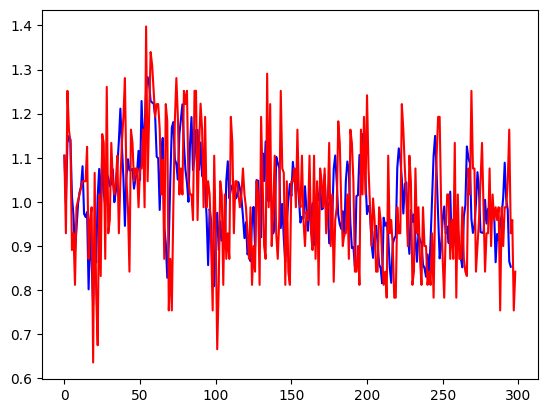

In [20]:
plt.plot(df_final['RTT'], color='b')
plt.plot(df['Final_range'], color='r')

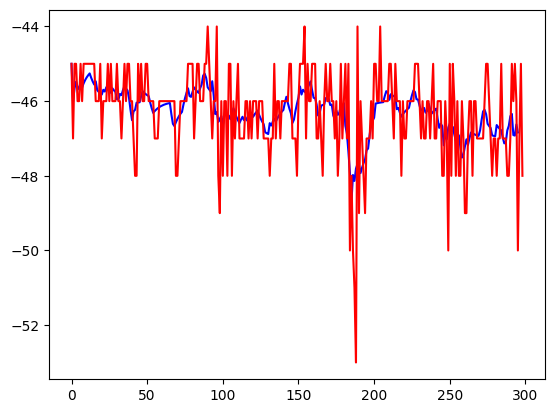

In [21]:
plt.plot(df_final['RSS'], color='b')
plt.plot(df['RSSI'], color='r')

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(df['True_Range'], df_final['RTT'])
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(df['True_Range'], df_final['RTT'])) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

Mean Squared Error in meter: 0.009
Root Mean Squared Error (RMSE) on new data in meter: 0.096
